
# Notebook Intentions

The purpose of this notebook is to simulate an amusement park. 


In [1]:
from park import Park
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS

### Book Keeping

    - Version: dictates the location performance graphs are stored
    - Verbosity: controls much information is displayed during a simulation, increase to show more info
    - Show Plots: controls whether park plots are displayed in this notebook
    - RNG Seed: seeds random number generators to enforce identical results across runs/machines
    

In [2]:
VERSION = "20K All FP - MIKE"
VERBOSITY = 1
SHOW_PLOTS = True
RNG_SEED = 10


## Park
 
The park contains Agents, Attractions and Activities.

- Total Daily Agents: dictates how many agents visit the park within a day
- Hourly Percent: dictates what percentage of Total Daily Agents visits the park at each hour.  last hour is closing time and must have 0 arrivals.
- Perfect Arrivals: enforces that the exact amount of Total Daily Agents arrives during the day
- Expedited Pass Ability Percent: percent of agents aware of expeditied passes
- Expedited Threshold: acceptable queue wait time length before searching for an expedited pass
- Expedited Limit: total number of expedited pass an agent can hold at any given time


In [3]:
TOTAL_DAILY_AGENTS = 50000 #38047 actual average
PERFECT_ARRIVALS = True
HOURLY_PERCENT = {
    "10:00 AM": 18,
    "11:00 AM": 23,
    "12:00 PM": 17,
    "1:00 PM": 15,
    "2:00 PM": 9,
    "3:00 PM": 7,
    "4:00 PM": 2,
    "5:00 PM": 5,
    "6:00 PM": 3,
    "7:00 PM": 1,
    "8:00 PM": 0,
    "9:00 PM": 0,
    "10:00 PM": 0
}
EXP_ABILITY_PCT = 0.95
EXP_THRESHOLD = 30
EXP_LIMIT = 1

## Agents

The park is populated by agents. Agents visit attractions and activities. They make decisions about where to go based on their preferences, the popularity of attractions and activities and waiting times. Each Agent has a behavioral archetype.

- Ride Enthusiast: wants to stay for a long time, go on as many attractions as possible, doesn't want to visit activites, doesn't mind waiting
- Ride Favorer: wants to go on a lot of attractions, but will vists activites occasionally, will wait for a while in a queue
- Park Tourer: wants to stay for a long time and wants to see attractions and activities equally, reasonable about wait times
- Park Visitor: doesn't want to stay long and wants to see attractions and activities equally, inpatient about wait times
- Activity Favorer: doesn't want to stay long and prefers activities, reasonable about wait times
- Activity Enthusiast: wants to visit a lot of activities, reasonable about wait times

Archetypes can be tweaked and new archetypes can be added in `behavior_reference.py`. 

- Agent Archetype Distribution: dictates the probability an agent will have a particular behavioral archetype


In [4]:
AGENT_ARCHETYPE_DISTRIBUTION = {
    "ride_enthusiast": 10,
    "ride_favorer": 15,
    "park_tourer": 25,
    "park_visitor": 30,
    "activity_favorer": 15,
    "activity_enthusiast": 5,
}


## Attractions

Attractions are essentially rides within a park. 

- Attractions: list of dictionaries that describe the attractions within the park
    - Name: name of the attraction
    - Run Time: How long the attraction take to run, in minutes
    - Capacity: Maximium number of agents that can be on the attraction during a run
    - Popularity: Value from 1-10 that describes how popular an attraction is with respect to other attractions
    - Expedited Queue: Dictates whether the attraction has an expedited queue or not
    - Expedited Queue Ratio: Dictates what percentage of attraction capacity is devoted to members of the expedited queue
    - Child Eligible: Dictates whether children can ride the attraction
    - Adult Eligible: Dictates whether adults can ride the attraction

In [5]:
ATTRACTIONS = [
    {
        "name": "Ride of Passage",
        "run_time": 7,
        "park_area": "Pandora",
        "hourly_throughput": 1646,
        "num_vehicles": 4,
        "agents_per_vehicle": 48,
        "popularity": 10,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Serengeti Safari",
        "run_time": 20,
        "park_area": "Africa",
        "hourly_throughput": 3240,
        "num_vehicles": 30,
        "agents_per_vehicle": 36,
        "popularity": 9,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Annapurna Adventure",
        "run_time": 3,
        "park_area": "Asia",
        "hourly_throughput": 2040,
        "num_vehicles": 3,
        "agents_per_vehicle": 34,
        "popularity": 8,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Kaveri Rapids",
        "run_time": 5,
        "park_area": "Asia",
        "hourly_throughput": 2160,
        "num_vehicles": 15,
        "agents_per_vehicle": 12,
        "popularity": 7,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Agave River Journey",
        "run_time": 5,
        "park_area": "Pandora",
        "hourly_throughput": 1440,
        "num_vehicles": 15,
        "agents_per_vehicle": 8,
        "popularity": 6,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Dinosaur",
        "run_time": 4,
        "park_area": "Dinoland USA",
        "hourly_throughput": 2520,
        "num_vehicles": 14,
        "agents_per_vehicle": 12,
        "popularity": 5,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Primeval Hurl",
        "run_time": 2,
        "park_area": "Dinoland USA",
        "hourly_throughput": 1440,
        "num_vehicles": 12,
        "agents_per_vehicle": 4,
        "popularity": 4,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    }
]

## Activities
Activities are everything to do within the park that isn't an attraction. 

- Activities: list of dictionaries that describe activities within the park
    - Name: name of the activity
    - Popularity: Value from 1-10 that describes how popular an activity is with respect to other activities
    - Mean Time: The expected time agents will spend at an activity

In [6]:
ACTIVITIES = [
    {
        "name": "sightseeing",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 5
    },
    {
        "name": "show",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 30
    },
    {
        "name": "merchandise",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 30
    },
    {
        "name": "food",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 45
    }
]

## Park Map
The park map is a reference of walking distance (minutes) between park areas.  Each attraction and activity is in one park area.

- PARK_MAP: dictionary of dictionaries that describe travel times between every possible pair of park areas.
    - SOURCE_PARK_AREA:
    - { DESTINATION_PARK_AREA: travel_time (in minutes), ... }

In [7]:
PARK_MAP = {
    "Discovery Island":
        {
            "Discovery Island": 1,  # distance for POI within same area
            "Pandora": 5,
            "Africa": 5,
            "Asia": 5,
            "Dinoland USA": 5,
            "Oasis": 3
        },
    "Pandora":
        {
            "Discovery Island": 5,
            "Pandora": 2,
            "Africa": 8,
            "Asia": 10,
            "Dinoland USA": 10,
            "Oasis": 8
        },
    "Africa":
        {
            "Discovery Island": 5,
            "Pandora": 8,
            "Africa": 2,
            "Asia": 6,
            "Dinoland USA": 10,
            "Oasis": 8
        },
    "Asia":
        {
            "Discovery Island": 5,
            "Pandora": 10,
            "Africa": 6,
            "Asia": 2,
            "Dinoland USA": 5,
            "Oasis": 8
        },
    "Dinoland USA":
        {
            "Discovery Island": 5,
            "Pandora": 10,
            "Africa": 10,
            "Asia": 5,
            "Dinoland USA": 1,
            "Oasis": 8
        },
    "Oasis":
        {
            "Discovery Island": 3,
            "Pandora": 8,
            "Africa": 8,
            "Asia": 8,
            "Dinoland USA": 8,
            "Oasis": 1
        }
}

## Entrance Park Area

This field defines the park area of the main gate, where agents start and end their park visit.

In [8]:
ENTRANCE_PARK_AREA = "Oasis"

## Plots

Set the Y limit of plots

In [9]:
PLOT_RANGE = {
    "Attraction Queue Length": 'auto',
    "Attraction Wait Time": 'auto',
    "Attraction Expedited Queue Length": 'auto',
    "Attraction Expedited Wait Time": 'auto',
    "Activity Vistors": 'auto',
    "Approximate Agent Distribution (General)": 1.0,
    "Approximate Agent Distribution (Specific)": 1.0,
    "Agent Arrivals and Departures": 'auto',
    "Attraction Average Wait Times": 'auto',
    "Attraction Expedited Queue Return Times": 'auto',
    "Agent Attractions Histogram": 1.0,
    "Attraction Total Visits": 'auto',
    "Expedited Pass Distribution": 'auto',
    "Age Class Distribution": 'auto',
}

## Simulation

Run the simulation here.

Time: 0
Total Agents in Park: 162
Attraction Wait Times (Minutes):
     Primeval Hurl: 0.0
     Dinosaur: 0.0
     Agave River Journey: 0.0
     Kaveri Rapids: 0.0
     Annapurna Adventure: 0.0
     Serengeti Safari: 0.0
     Ride of Passage: 0.0
Activity Visitor (Agents):
     sightseeing: 0
     show: 0
     merchandise: 0
     food: 0
--------------------------------------------------

Time: 60
Total Agents in Park: 9228
Attraction Wait Times (Minutes):
     Primeval Hurl: 0.0
     Dinosaur: 0.0
     Agave River Journey: 0.0
     Kaveri Rapids: 0.0
     Annapurna Adventure: 0.0
     Serengeti Safari: 0.0
     Ride of Passage: 22.0
Activity Visitor (Agents):
     sightseeing: 297
     show: 1592
     merchandise: 1611
     food: 1996
--------------------------------------------------

Time: 120
Total Agents in Park: 20539
Attraction Wait Times (Minutes):
     Primeval Hurl: 45.0
     Dinosaur: 0.0
     Agave River Journey: 67.0
     Kaveri Rapids: 15.0
     Annapurna Adventure: 37.0


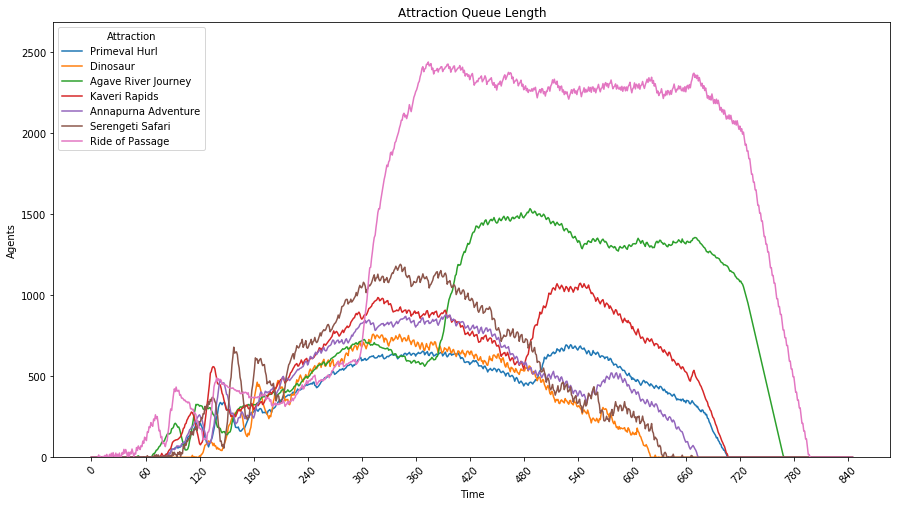

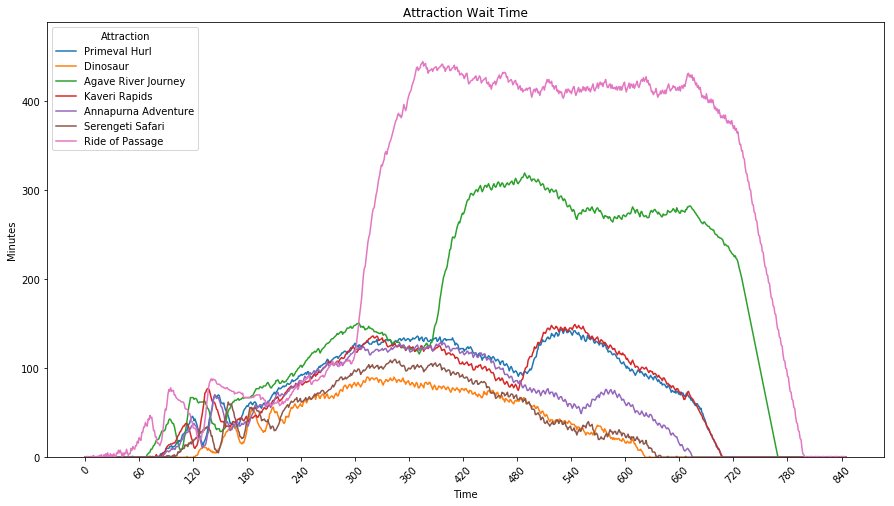

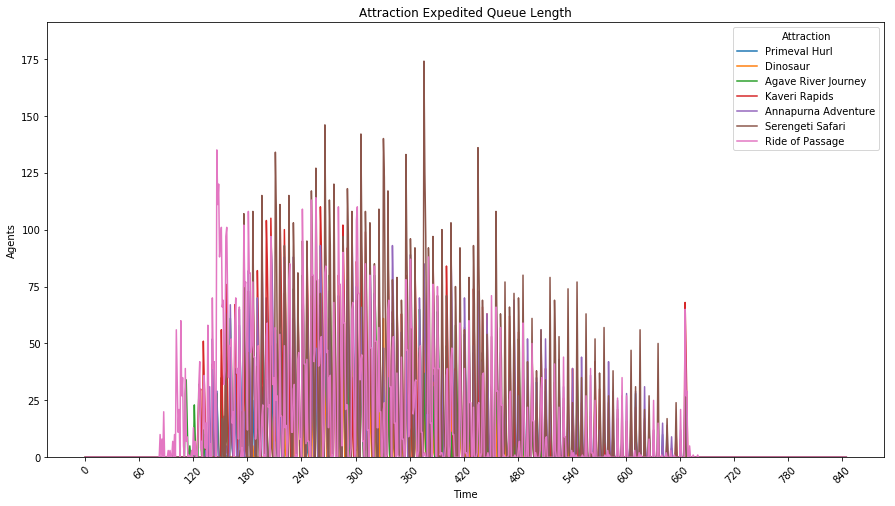

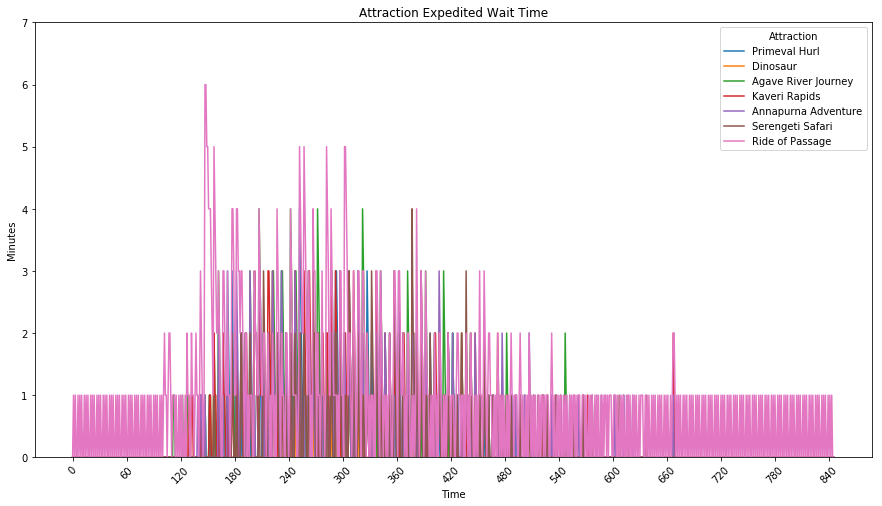

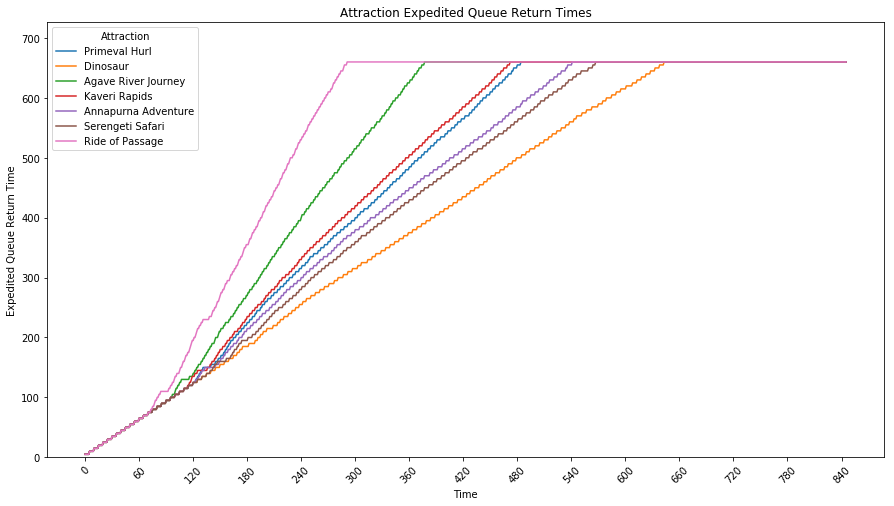

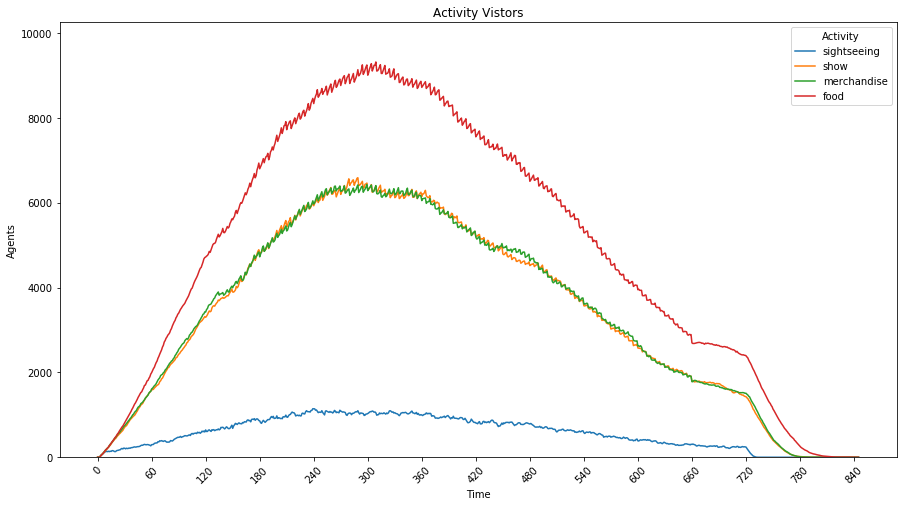

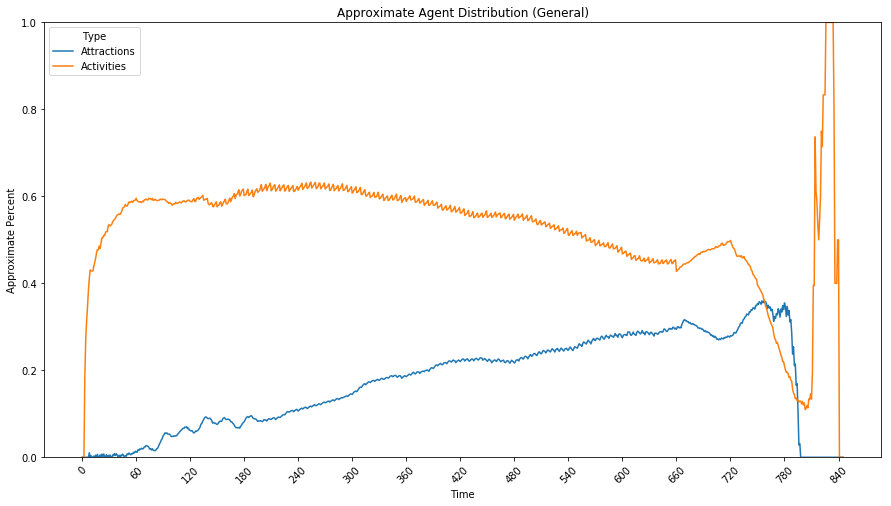

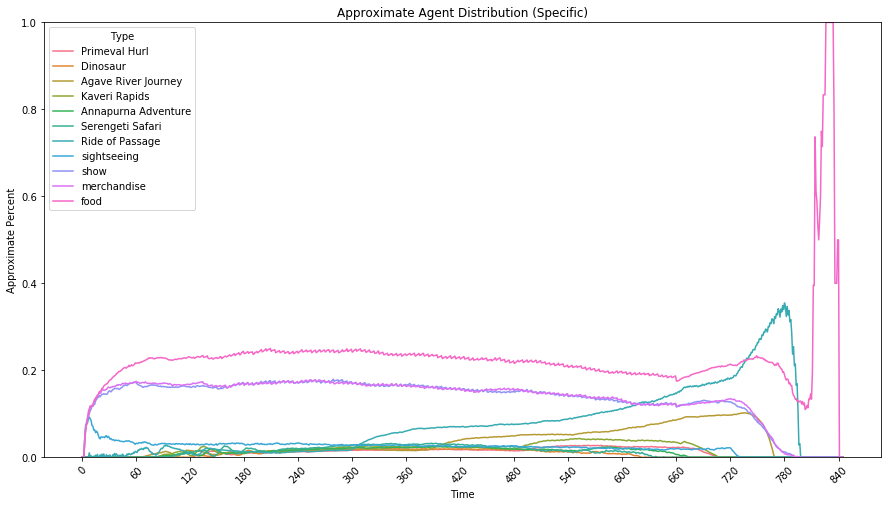

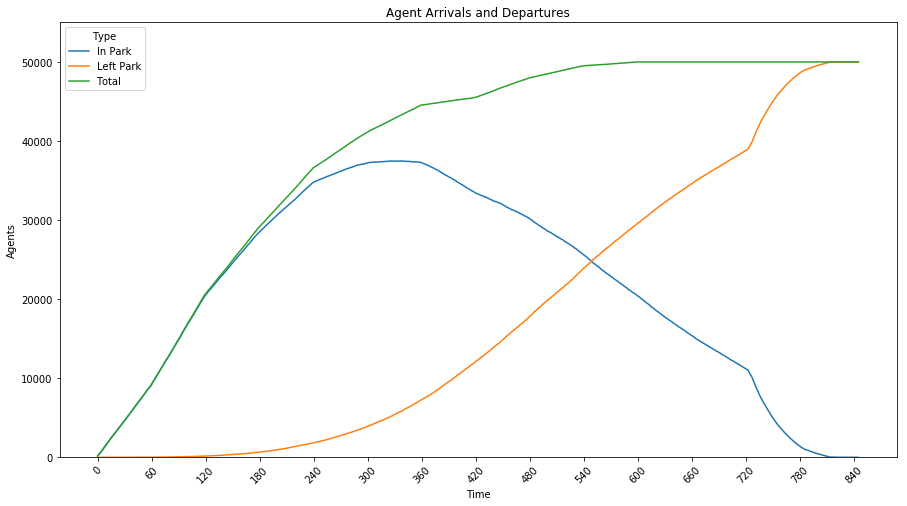

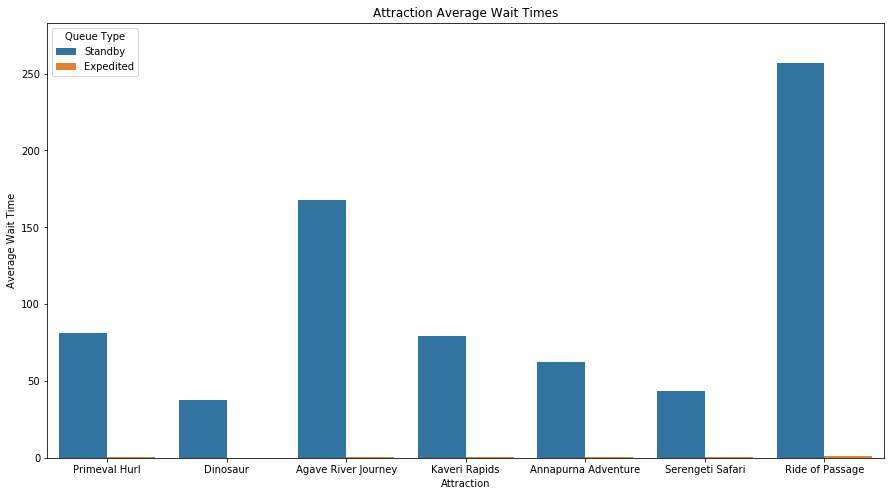

+---------------------+---------------------+--------------+
| Attraction          |   Average Wait Time | Queue Type   |
|---------------------+---------------------+--------------|
| Primeval Hurl       |                0.28 | Expedited    |
| Dinosaur            |                0.05 | Expedited    |
| Agave River Journey |                0.35 | Expedited    |
| Kaveri Rapids       |                0.34 | Expedited    |
| Annapurna Adventure |                0.32 | Expedited    |
| Serengeti Safari    |                0.26 | Expedited    |
| Ride of Passage     |                0.97 | Expedited    |
| Primeval Hurl       |               81.27 | Standby      |
| Dinosaur            |               37.40 | Standby      |
| Agave River Journey |              167.46 | Standby      |
| Kaveri Rapids       |               79.00 | Standby      |
| Annapurna Adventure |               62.02 | Standby      |
| Serengeti Safari    |               43.67 | Standby      |
| Ride of Passage     | 

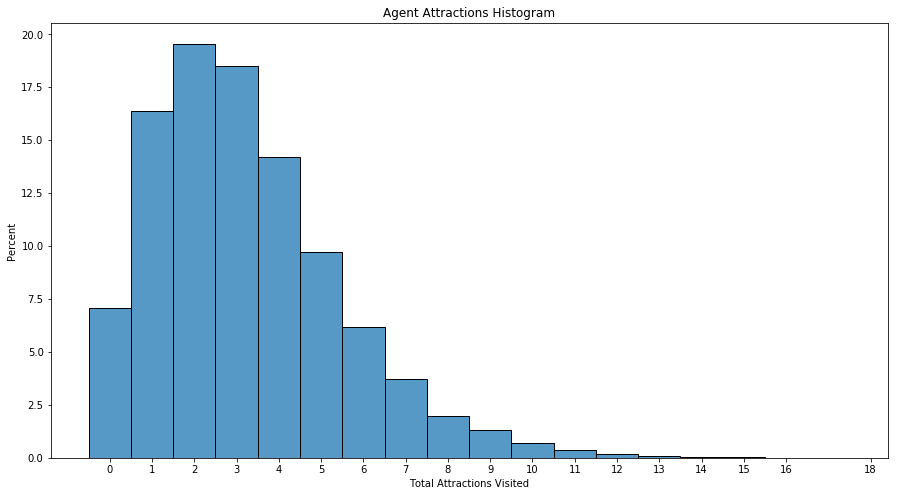

+----------+-----------------------------+
| Metric   |   Total Attractions Visited |
|----------+-----------------------------|
| count    |                    50000.00 |
| mean     |                        3.23 |
| std      |                        2.24 |
| min      |                        0.00 |
| 25%      |                        2.00 |
| 50%      |                        3.00 |
| 75%      |                        4.00 |
| max      |                       18.00 |
+----------+-----------------------------+


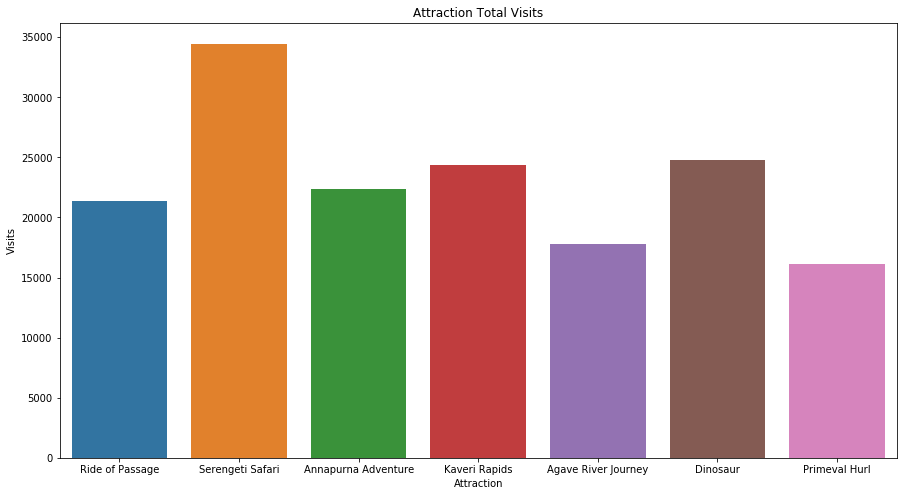

+---------------------+----------+
| Attraction          |   Visits |
|---------------------+----------|
| Agave River Journey |    17772 |
| Annapurna Adventure |    22346 |
| Dinosaur            |    24782 |
| Kaveri Rapids       |    24378 |
| Primeval Hurl       |    16134 |
| Ride of Passage     |    21393 |
| Serengeti Safari    |    34462 |
+---------------------+----------+


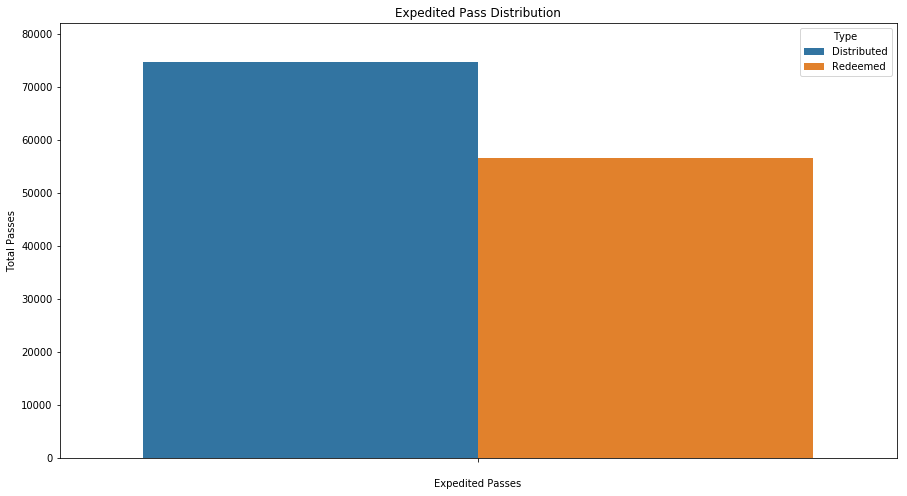

+--------------------+----------------+-------------+
| Expedited Passes   |   Total Passes | Type        |
|--------------------+----------------+-------------|
|                    |          74565 | Distributed |
|                    |          56637 | Redeemed    |
+--------------------+----------------+-------------+


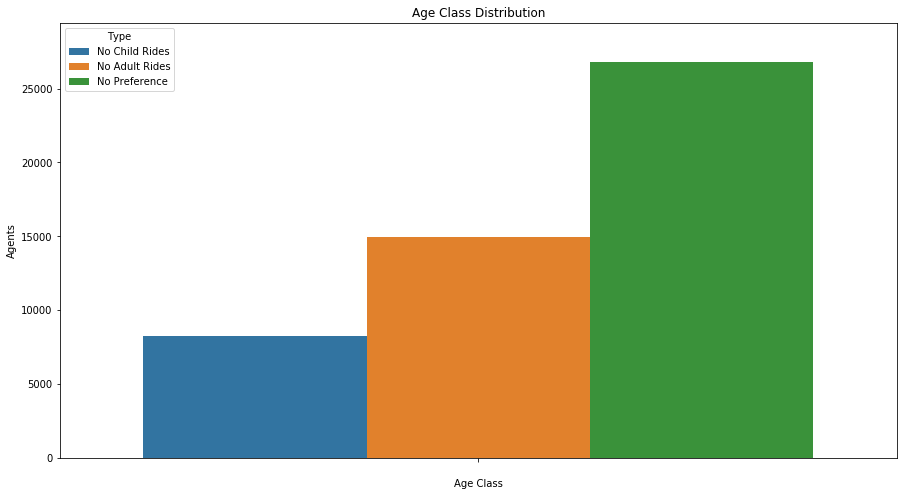

+-------------+----------+----------------+
| Age Class   |   Agents | Type           |
|-------------+----------+----------------|
|             |    14981 | No Adult Rides |
|             |     8247 | No Child Rides |
|             |    26772 | No Preference  |
+-------------+----------+----------------+
Agent ID: 40822
Agent Archetype: park_visitor
Agent arrived at park at time 296. Agent picked up an expedited pass for Agave River Journey at time 304. The expedited queue return time is in 216 minutes. Agent visited the activity merchandise at time 310. Agent exited the activity merchandise at time 337. Agent visited the activity show at time 339. Agent exited the activity show at time 366. Agent visited the activity show at time 368. Agent exited the activity show at time 395. Agent visited the activity food at time 397. Agent exited the activity food at time 438. Agent visited the activity merchandise at time 440. Agent exited the activity merchandise at time 467. Agent visited th

In [10]:
# Initialize Park
RNG_SEED = 5

park = Park(
    attraction_list=ATTRACTIONS,
    activity_list=ACTIVITIES,
    park_map=PARK_MAP,
    entrance_park_area=ENTRANCE_PARK_AREA,
    plot_range=PLOT_RANGE,
    random_seed=RNG_SEED,
    version=VERSION,
    verbosity=VERBOSITY
)

# Build Arrivals

park.generate_arrival_schedule(
    arrival_seed=HOURLY_PERCENT, 
    total_daily_agents=TOTAL_DAILY_AGENTS, 
    perfect_arrivals=PERFECT_ARRIVALS,
)

# Build Agents
park.generate_agents(
    behavior_archetype_distribution=AGENT_ARCHETYPE_DISTRIBUTION,
    exp_ability_pct=EXP_ABILITY_PCT,
    exp_wait_threshold=EXP_THRESHOLD,
    exp_limit=EXP_LIMIT
)

# Build Attractions + Activities
park.generate_attractions()
park.generate_activities()

# Pass Time
for _ in range((len(HOURLY_PERCENT.keys()) - 1) * 60):
    park.step()
    
print("Park is now closed.  Running overtime until all agents exit the park.")
overtime_counter = 0
while park.active_agents > 0:
    park.step()
    if overtime_counter % 60 == 0:
        print(f"{overtime_counter} minutes after park close: {park.active_agents} still in park.")
    overtime_counter += 1

# Save Parameters of Current Run
sim_parameters = {
    "VERSION": VERSION,
    "VERBOSITY": VERBOSITY,
    "SHOW_PLOTS": SHOW_PLOTS,
    "RNG_SEED": RNG_SEED,
    "TOTAL_DAILY_AGENTS": TOTAL_DAILY_AGENTS,
    "PERFECT_ARRIVALS": PERFECT_ARRIVALS,
    "HOURLY_PERCENT": HOURLY_PERCENT,
    "EXP_ABILITY_PCT": EXP_ABILITY_PCT,
    "EXP_THRESHOLD": EXP_THRESHOLD,
    "EXP_LIMIT": EXP_LIMIT,
    "AGENT_ARCHETYPE_DISTRIBUTION": AGENT_ARCHETYPE_DISTRIBUTION,
    "ATTRACTIONS": ATTRACTIONS,
    "ACTIVITIES": ACTIVITIES,
    "BEHAVIOR_ARCHETYPE_PARAMETERS": BEHAVIOR_ARCHETYPE_PARAMETERS,
}
park.write_data_to_file(
    data=sim_parameters, 
    output_file_path=f"{VERSION}/parameters", 
    output_file_format="json"
)

# Store + Print Data
park.make_plots(show=SHOW_PLOTS)
park.print_logs(N = 5)
#park.print_logs(selected_agent_ids = [778])

In [11]:
park.agents[2].log
#park.plot_range = PLOT_RANGE
#park.make_plots(show=SHOW_PLOTS)

'Agent arrived at park at time 0. Agent visited the activity show at time 3. Agent exited the activity show at time 33. Agent entered queue for Serengeti Safari at time 39. Agent boarded Serengeti Safari at time 39. Agent exited Serengeti Safari at time 59. Agent entered queue for Ride of Passage at time 68. Agent boarded Ride of Passage at time 75. Agent exited Ride of Passage at time 82. Agent entered queue for Agave River Journey at time 85. Agent boarded Agave River Journey at time 90. Agent exited Agave River Journey at time 95. Agent visited the activity show at time 101. Agent exited the activity show at time 131. Agent picked up an expedited pass for Ride of Passage at time 137. The expedited queue return time is in 93 minutes. Agent visited the activity sightseeing at time 143. Agent exited the activity sightseeing at time 148. Agent visited the activity food at time 150. Agent exited the activity food at time 195. Agent visited the activity sightseeing at time 197. Agent exit

In [12]:
#import numpy as np
#rng = np.random.default_rng(10+23496)
#mean_time = 45
#rng.normal(mean_time, mean_time/2, 15)
#max((rng.normal(mean_time, mean_time/2, 1))[0], 1)
#park.activities['food'].state["visitor_time_remaining"]

#[
#            (ind, agent_id) for ind, agent_id in enumerate(park.activities['food'].state["visitors"])
#            if park.activities['food'].state["visitor_time_remaining"][ind] == 0
#        ]

park.agents[11748].log

'Agent arrived at park at time 74. Agent visited the activity sightseeing at time 77. Agent exited the activity sightseeing at time 81. Agent visited the activity show at time 83. Agent exited the activity show at time 107. Agent visited the activity sightseeing at time 109. Agent exited the activity sightseeing at time 113. Agent visited the activity sightseeing at time 115. Agent exited the activity sightseeing at time 119. Agent picked up an expedited pass for Agave River Journey at time 125. The expedited queue return time is in 25 minutes. Agent visited the activity food at time 131. Agent exited the activity food at time 150. Agent entered exp queue for Agave River Journey at time 156. Agent boarded Agave River Journey and redeemed their expedited queue pass at time 157. Agent exited Agave River Journey at time 162. Agent visited the activity show at time 168. Agent exited the activity show at time 192. Agent picked up an expedited pass for Ride of Passage at time 198. The expedi

In [13]:
park.attractions['Primeval Hurl'].capacity#history["exp_queue_length"]#state["agents_in_attraction"])
# agents_in_attraction, queue, exp_queue, exp_queue_passes_distributed, exp_queue_passes_skipped,
# exp_return_time

# attraction.capacity --> capacity of each cycle, not guests per minute! no wonder.

AttributeError: 'Attraction' object has no attribute 'capacity'

In [ ]:
# design graph that shows time of sim vs return window start time for each attraction.
attrs = vars(park.attractions['Primeval Hurl'])
for attr in attrs:
    print(attr, type(attrs[attr]))


In [ ]:
park.make_plots(show=SHOW_PLOTS)
park.print_logs(N = 5)